### Import Dependecies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import tensorflow as tf
from tensorflow import keras


C:\Users\Aravind\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load Data

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

### EDA

In [5]:
df3=df['Churn'].value_counts()
df3

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
df3/sum(df3)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

([<matplotlib.patches.Wedge at 0x281d9ab7288>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')])

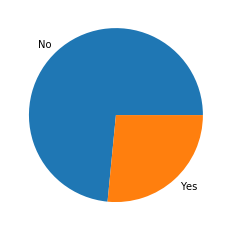

In [7]:
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'])

In [8]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.drop('customerID',axis='columns',inplace=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#Converting TotalCharges to float64 

In [14]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [16]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [17]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [18]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
df1=df[df.TotalCharges!=' ']

In [20]:
df1.shape

(7032, 20)

In [21]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Aravind\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [23]:
df1.TotalCharges.dtype

dtype('float64')

In [24]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### print unique column values

In [25]:
def print_unq_col_vals(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [26]:
print_unq_col_vals(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [27]:
df1.replace('No internet service' ,'No',inplace=True)
df1.replace('No phone service' ,'No',inplace=True)

C:\Users\Aravind\Anaconda3\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [28]:
df1.replace({'Yes':1,'No':0},inplace=True)


In [29]:
df1['InternetService'].replace(0,'PaymentMethod',inplace=True)
df1['InternetService'].unique()

C:\Users\Aravind\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['DSL', 'Fiber optic', 'PaymentMethod'], dtype=object)

In [30]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [31]:
for col in df1:
    print (f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'PaymentMethod']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [32]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


C:\Users\Aravind\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [33]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_PaymentMethod', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_PaymentMethod,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [35]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_PaymentMethod  

### Scaling Data

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

columns_to_scale=['tenure','MonthlyCharges','TotalCharges']

df2[columns_to_scale]=scaler.fit_transform(df2[columns_to_scale])

In [37]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_PaymentMethod,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


### Splitting Data 

In [38]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [39]:
X_train.shape,y_train.shape

((5625, 26), (5625,))

### ANN Model

In [61]:
ANN=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

ANN.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

ANN.fit(X_train,y_train,epochs=5)

Epoch 1/5
94/94 [==============================] - 1s 2ms/step - loss: 0.6175 - accuracy: 0.6983
Epoch 2/5
94/94 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7572
Epoch 3/5
94/94 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7615
Epoch 4/5
94/94 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7649
Epoch 5/5
94/94 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7602


In [62]:
ANN.evaluate(X_test,y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7553


[0.5079233646392822, 0.7553476095199585]

In [63]:
yp= ANN.predict(X_test)

In [64]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [65]:
y_pred[10]

1

In [66]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       374
           1       0.74      0.78      0.76       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



In [217]:
cm=confusion_matrix(y_test,y_pred)


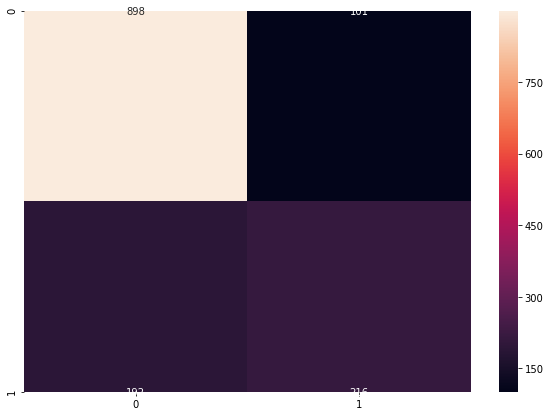

In [224]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')

### Using other ML algorithms

In [40]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [41]:
#Fit the logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

# Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

In [47]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.79      0.79      0.79      1407



In [42]:
#Fit the Support Vector Machine Model
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

In [48]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.66      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



In [43]:
#Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)

# Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

In [49]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       999
           1       0.58      0.52      0.55       408

    accuracy                           0.75      1407
   macro avg       0.69      0.68      0.69      1407
weighted avg       0.74      0.75      0.75      1407



In [44]:
#Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

In [52]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       999
           1       0.50      0.51      0.50       408

    accuracy                           0.71      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.71      0.71      0.71      1407



In [45]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

In [51]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.65      0.48      0.55       408

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.78      0.76      1407



In [46]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [logmodel_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,79.46,Logistic Regression
1,78.61,Support Vector Machine
2,77.54,Random Forest
3,74.98,K-Nearest Neighbor
4,70.79,Decision Tree


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

## Fixing Unbalanced Data 

In [106]:
#from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [77]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=50)
    else:
        model.fit(X_train, y_train, epochs=50, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [78]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.6293 - accuracy: 0.6686
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7565
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7642
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7645
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7729
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7689
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7709
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7662
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7719
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7776
Epoch 11/50
94/94 [

### Method 1: Undersampling


In [79]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [80]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [81]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [82]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [83]:
y_train.value_counts()


0    1495
1    1495
Name: Churn, dtype: int64

### Method2: Oversampling


In [84]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [85]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [86]:
y_train.value_counts()
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
259/259 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7146
Epoch 2/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.7644
Epoch 3/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7686
Epoch 4/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7682
Epoch 5/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7712
Epoch 6/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7755
Epoch 7/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.7765
Epoch 8/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7772
Epoch 9/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.7804
Epoch 10/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7791

### Method3: SMOTE


In [87]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [90]:
y_train.value_counts()


1    4130
0    4130
Name: Churn, dtype: int64

In [91]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/50
259/259 [==============================] - 1s 1ms/step - loss: 0.5245 - accuracy: 0.7501
Epoch 2/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7755
Epoch 3/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7781
Epoch 4/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.7777
Epoch 5/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7826
Epoch 6/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.7875
Epoch 7/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7851
Epoch 8/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7898
Epoch 9/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7912
Epoch 10/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.7961

### Method4: Use of Ensemble with undersampling


In [92]:
df2.Churn.value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

In [93]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [95]:
y_train.value_counts()


0    4130
1    1495
Name: Churn, dtype: int64

In [96]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [97]:
df3.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_PaymentMethod,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [98]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [99]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [100]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
94/94 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6746
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7569
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.7599
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7649
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7672
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7689
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7712
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7702
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7706
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7753
Epoch 11/50
94/94 [

In [101]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.5842 - accuracy: 0.7074
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7505
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7589
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7592
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7605
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7669
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7679
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7709
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7763
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7712
Epoch 11/50
94/94 [

In [102]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
83/83 [==============================] - 1s 1ms/step - loss: 0.6092 - accuracy: 0.6854
Epoch 2/50
83/83 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7613
Epoch 3/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7712
Epoch 4/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7738
Epoch 5/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7761
Epoch 6/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7818
Epoch 7/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7841
Epoch 8/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7844
Epoch 9/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.7833
Epoch 10/50
83/83 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7841
Epoch 11/50
83/83 [

In [103]:
len(y_pred1)


1407

In [104]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [105]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407

